In [1]:
import numpy as np
from matplotlib import pyplot
from scipy import linalg
import copy
import iMPS
from scipy.sparse import linalg
import funcs
import time
from scipy.optimize import bisect

Renormalization

In [2]:
def num2list(num):
    return np.array(list(np.binary_repr(num).zfill(4))).astype(np.int8)

def xlogx(s):
    return  -s*np.log2(s)

def S1(K):
    s = 0
    for i in range(16):
        tau = num2list(i)*2-1
        
        s += xlogx((1+np.prod(np.tanh(K*tau)))/16)
        
    return s

def S2(K):
    s = 0
    for i in range(16):
        tau = num2list(i)*2-1
        
        s += xlogx(np.cosh(K*np.sum(tau))/(16*np.cosh(K)**4))
        
    return s


def S1_renyi(K,n=2):
    s = 0
    for i in range(16):
        tau = num2list(i)*2-1
        
        s += ((1+np.prod(np.tanh(K*tau)))/16)**n
        
    return np.log2(s)/(1-n)

def S2_renyi(K,n=2):
    s = 0
    for i in range(16):
        tau = num2list(i)*2-1
        
        s += (np.cosh(K*np.sum(tau))/(16*np.cosh(K)**4))**n
        
    return np.log2(s)/(1-n)

In [9]:
def Hnr(K):
    return S1_renyi(K,200)-S2_renyi(K,200)-1
1/(1+np.exp(2*bisect(Hnr,0.,1.1)))

0.29213148065921374

In [3]:
x = 2**np.arange(1.01,7.5,.1)
y1 = []
y2 = []
def renyi2(x,n):
    return np.log2(x**n+(1-x)**n)/(1-n)

for i in x:
    def Hn(p):
        return renyi2(p,i)-0.5
    def Hnr(K):
        return S1_renyi(K,i)-S2_renyi(K,i)-1
    
    y1.append( bisect(Hn,0,.3))
    y2.append( 1/(1+np.exp(2*bisect(Hnr,0.,2))))

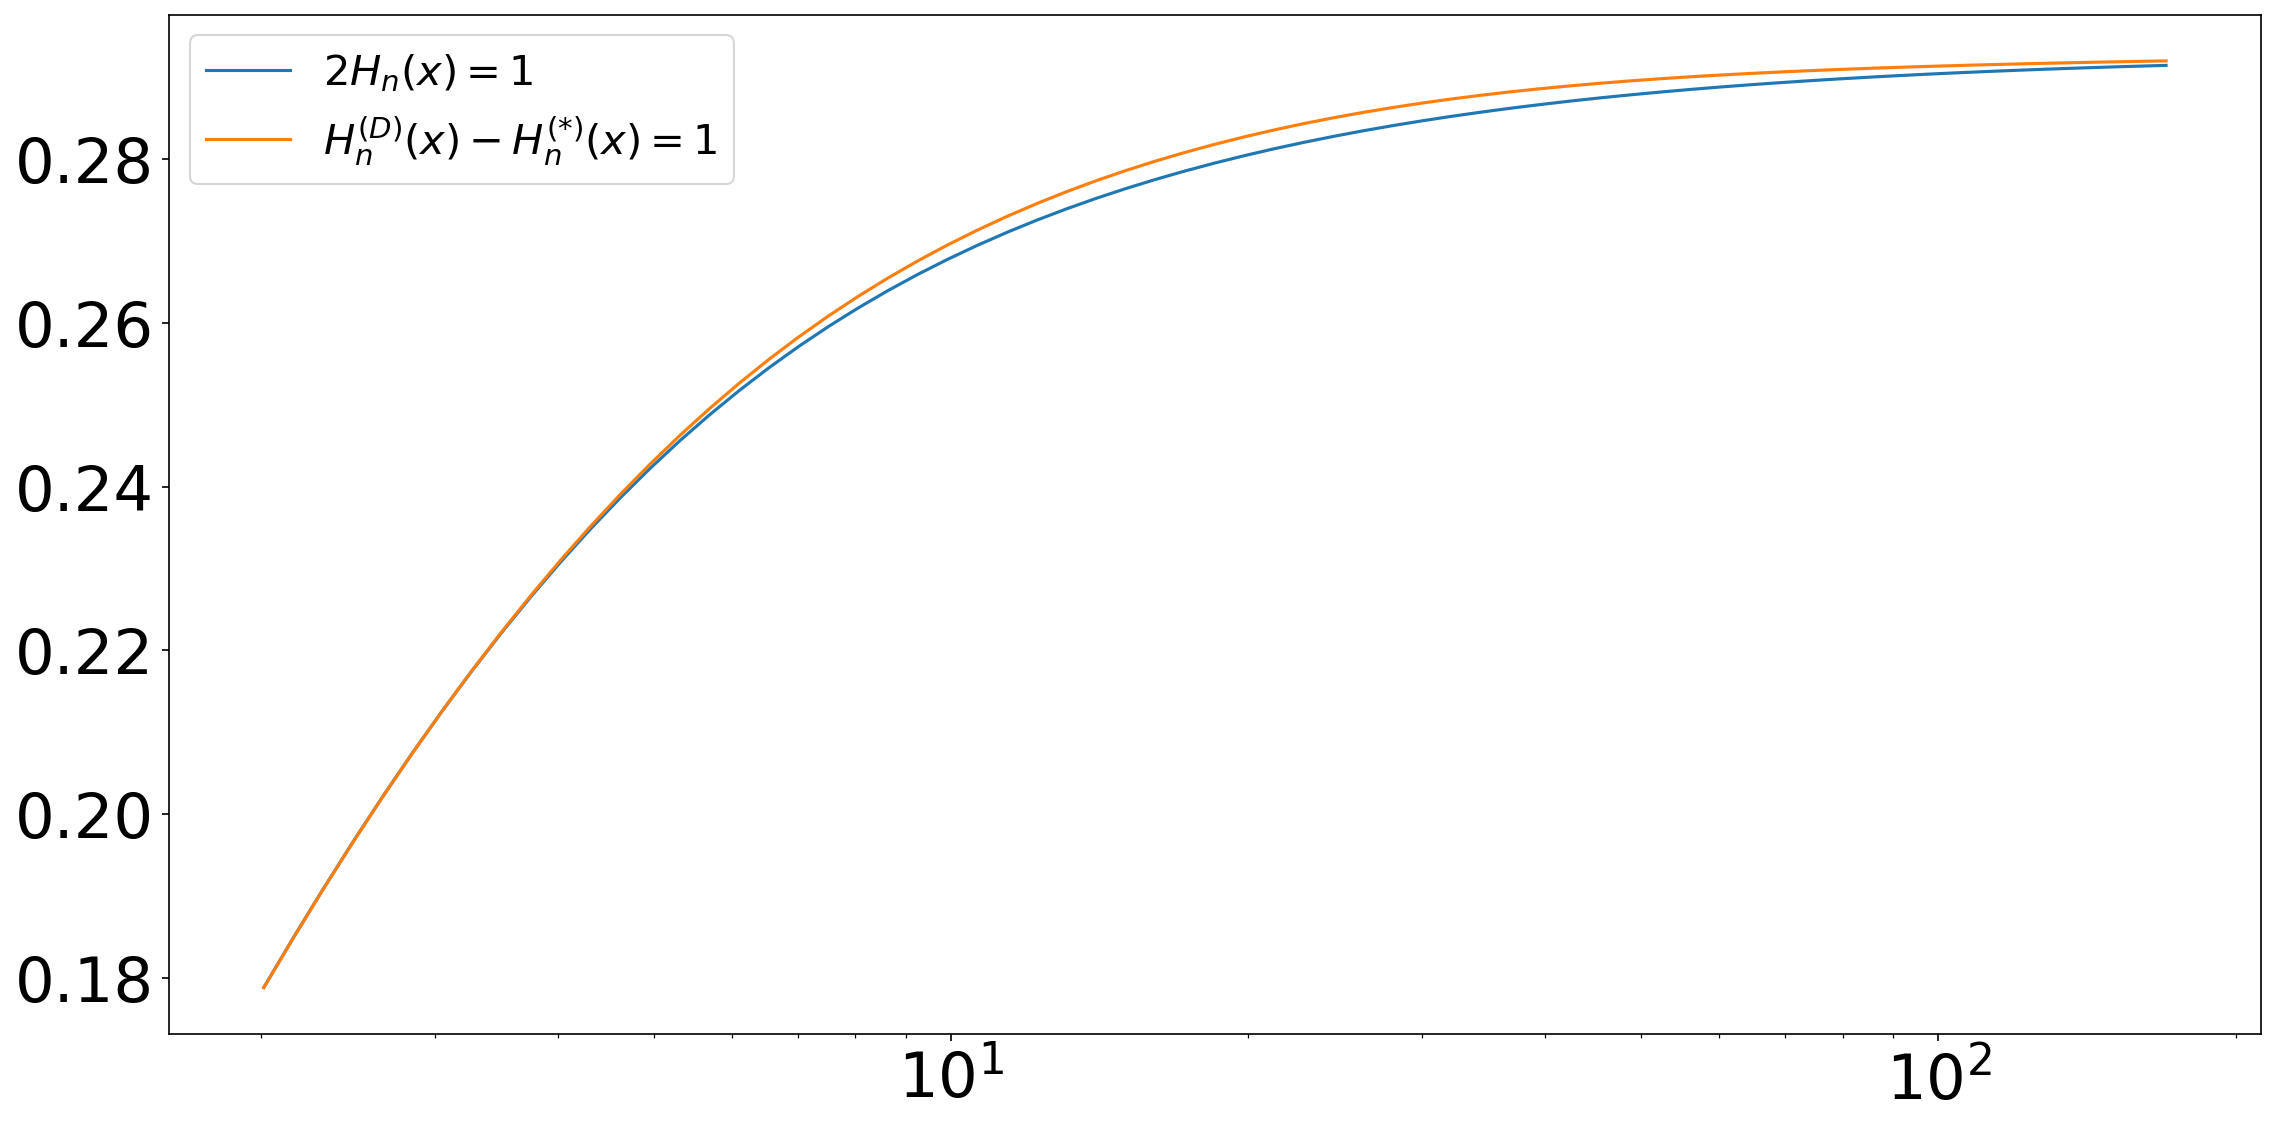

In [4]:
pyplot.figure(figsize=(18,9),dpi=150)
pyplot.plot(x,y1,'-',label = '$2H_n(x) = 1$')
pyplot.plot(x,y2,'-',label = '$H^{(D)}_n(x) - H^{(*)}_n(x) = 1$')

pyplot.xticks(size=30)
pyplot.yticks(size=30)
pyplot.legend(prop={'size':20})
pyplot.xscale('log')
pyplot.show()

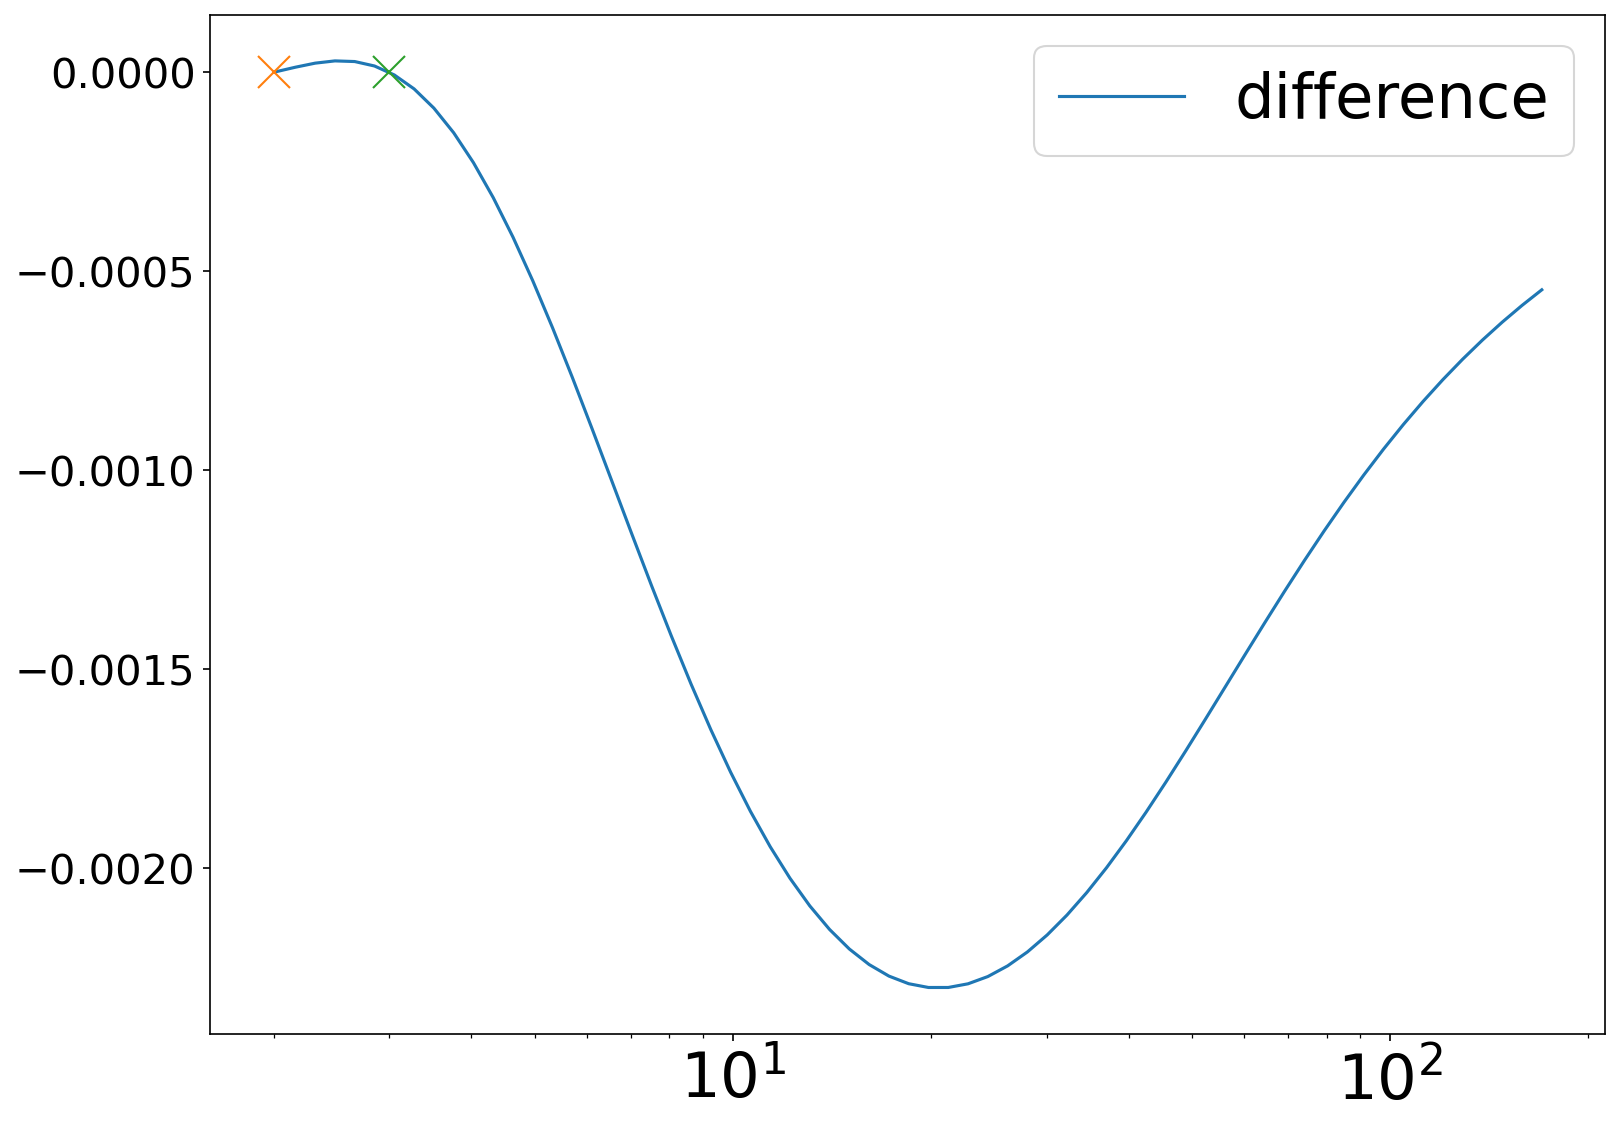

In [17]:
pyplot.figure(figsize=(12,9),dpi=150)
pyplot.plot(x,np.array(y1)-np.array(y2),'-',label='difference')
pyplot.plot([2],[0],'x',markersize=15)
pyplot.plot([3],[0],'x',markersize=15)
pyplot.xscale('log')
pyplot.xticks(size=30)
pyplot.yticks(size=20)
pyplot.legend(prop={'size':30})
pyplot.show()